In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
train = pd.read_csv("train_B.csv")
test = pd.read_csv("test_B.csv")

In [3]:
# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(columns=['category'])
y_train = train['category']

# Separar características y etiquetas para conjunto de entrenamiento
X_test = test.drop(columns=['category'])
y_test = test['category']

In [4]:
import joblib
RF = joblib.load('RF_model1.pkl')

y_pred = RF.predict(X_test)
print('Precision en test: ', accuracy_score(y_test, y_pred))

Precision en test:  0.8696524733876018


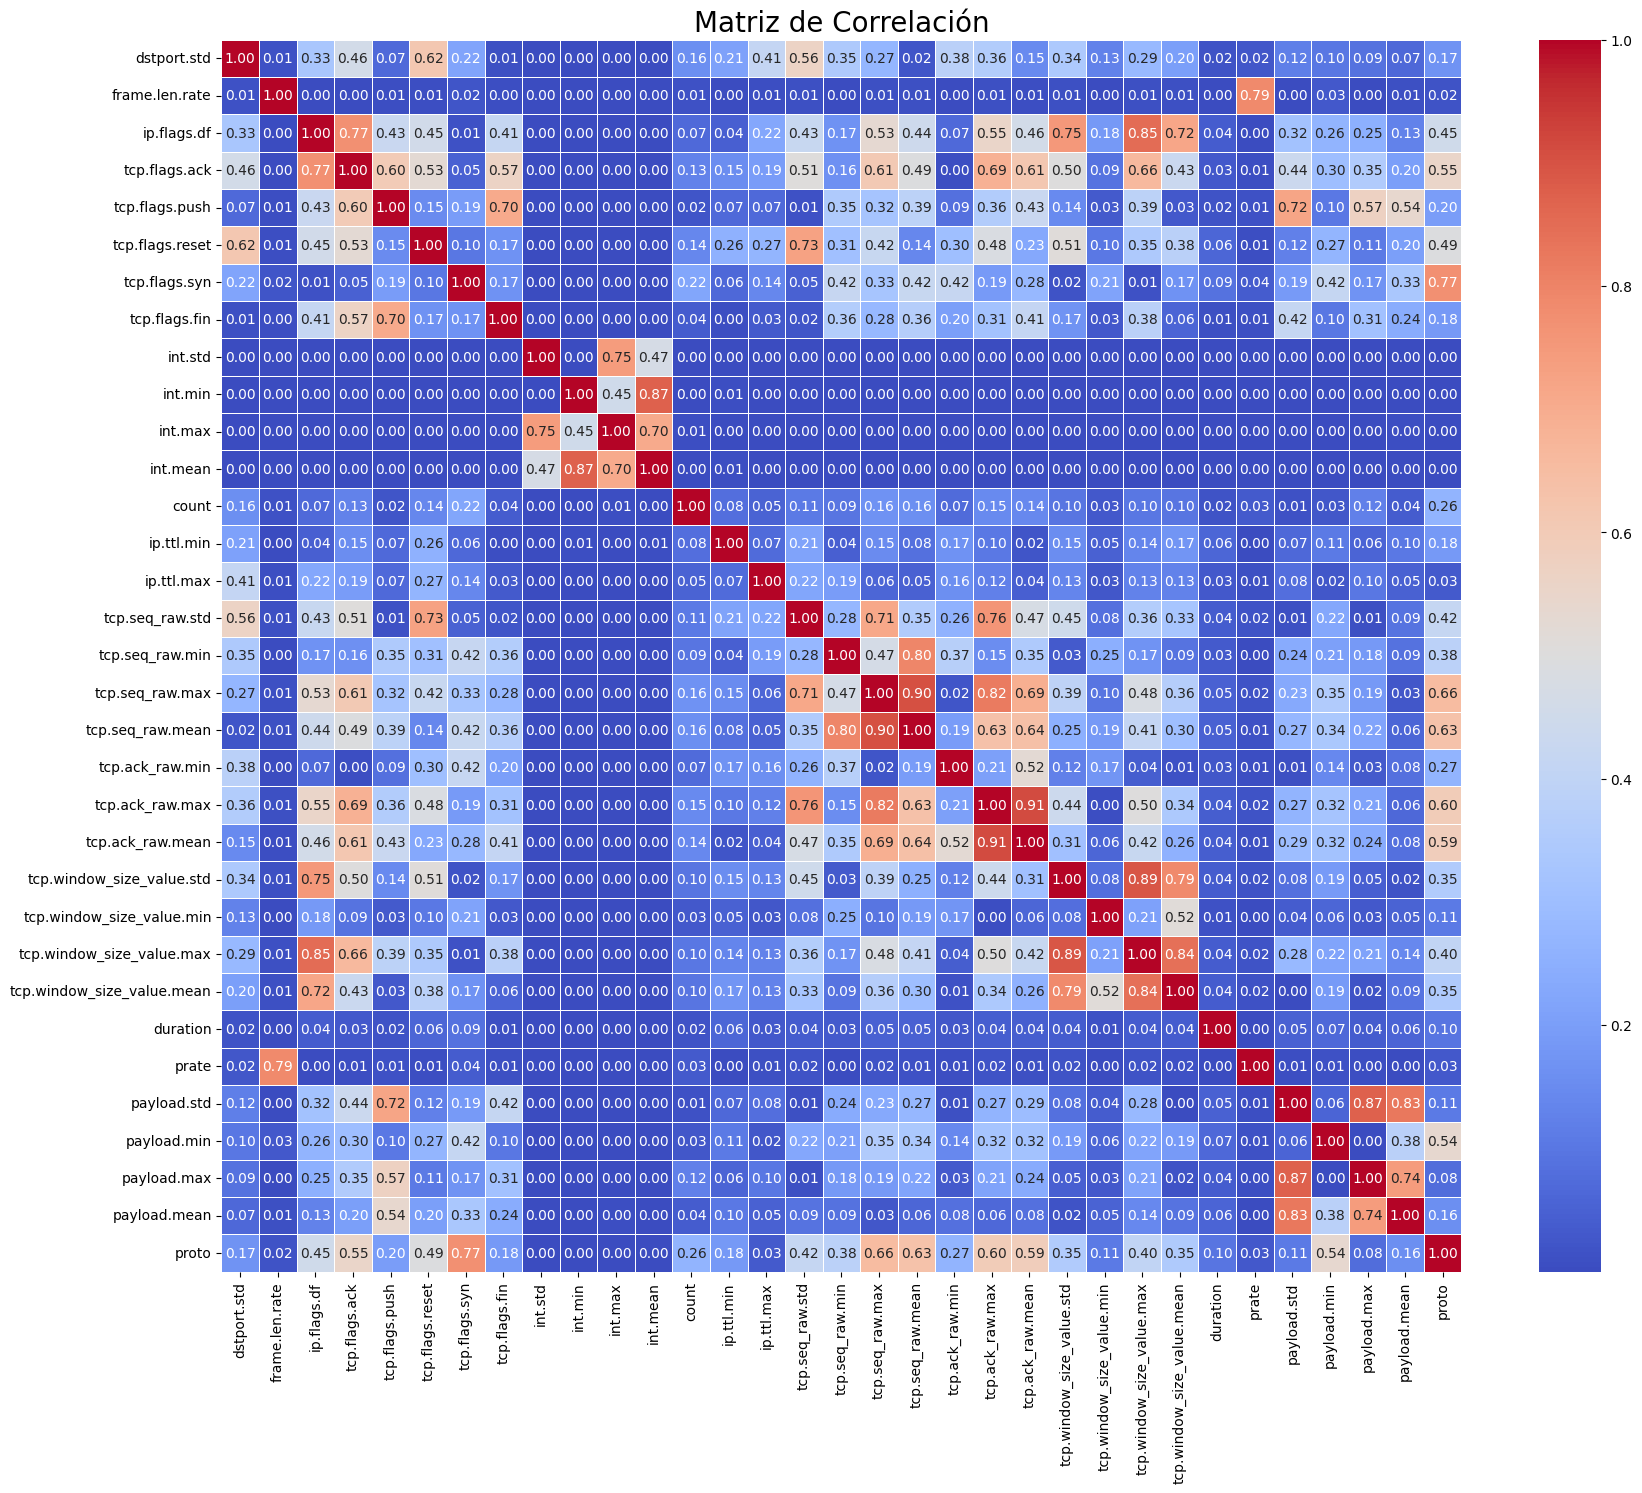

In [5]:
corr_matrix = X_train.corr().abs()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=20)
plt.show()

In [6]:
def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns. Sets cannot contain duplicated elements
    col_corr = set()
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        # check with other features (Not with itself)
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value

                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [7]:
corr_features = correlation(X_train, 0.78)
len(set(corr_features))

0.8734856128582521 int.mean int.min
0.7953485760666098 tcp.seq_raw.mean tcp.seq_raw.min
0.9028231538344306 tcp.seq_raw.mean tcp.seq_raw.max
0.8172676894832748 tcp.ack_raw.max tcp.seq_raw.max
0.9124857948600464 tcp.ack_raw.mean tcp.ack_raw.max
0.8510828438760653 tcp.window_size_value.max ip.flags.df
0.8936854354165108 tcp.window_size_value.max tcp.window_size_value.std
0.7888801357619086 tcp.window_size_value.mean tcp.window_size_value.std
0.8433381502788534 tcp.window_size_value.mean tcp.window_size_value.max
0.7870635411356312 prate frame.len.rate
0.8739356522748043 payload.max payload.std
0.8273184265938233 payload.mean payload.std


9

In [8]:
RF = RandomForestClassifier(max_depth=18)

sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.85,
    missing_values="raise",
    selection_method="model_performance",
    estimator=RF,
    scoring="accuracy",
    cv=5,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(cv=5, estimator=RandomForestClassifier(max_depth=18),
                         missing_values='raise', scoring='accuracy',
                         selection_method='model_performance', threshold=0.85)

In [32]:
sel.correlated_feature_sets_

[{'frame.len.rate', 'prate'},
 {'int.max', 'int.std'},
 {'ip.flags.df', 'tcp.window_size_value.max'},
 {'payload.max', 'payload.std'},
 {'tcp.ack_raw.max', 'tcp.ack_raw.mean', 'tcp.seq_raw.max'},
 {'tcp.seq_raw.mean', 'tcp.seq_raw.min'},
 {'tcp.window_size_value.mean', 'tcp.window_size_value.std'}]

In [33]:
corr_features = sel.features_to_drop_
sel.features_to_drop_

['prate',
 'int.std',
 'ip.flags.df',
 'payload.std',
 'tcp.ack_raw.max',
 'tcp.ack_raw.mean',
 'tcp.seq_raw.min',
 'tcp.window_size_value.std']

In [ ]:
X_train.drop(columns=corr_features, axis=1, inplace=True)
X_test.drop(columns=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1119, 25), (320, 25))

In [ ]:
RF = RandomForestClassifier()

param_grid = {'max_depth': [18]} 
grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid.fit(X_train, y_train)

print('Best Cross Validation Score:', grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': np.float64(9.1)}
Best Cross Validation Score: 0.6397901985906469
Test Score: 0.653125


In [ ]:
RF =  grid.best_estimator_

print('Train Score:', RF.score(X_train, y_train))

y_pred = RF.predict(X_test)

start2=time.time()
print('Precision en test: ', accuracy_score(y_test, y_pred))
stop2=time.time()

tiempo2 = stop2 - start2
print(f"Tiempo de prediccion (Test) RF: {tiempo2}s")

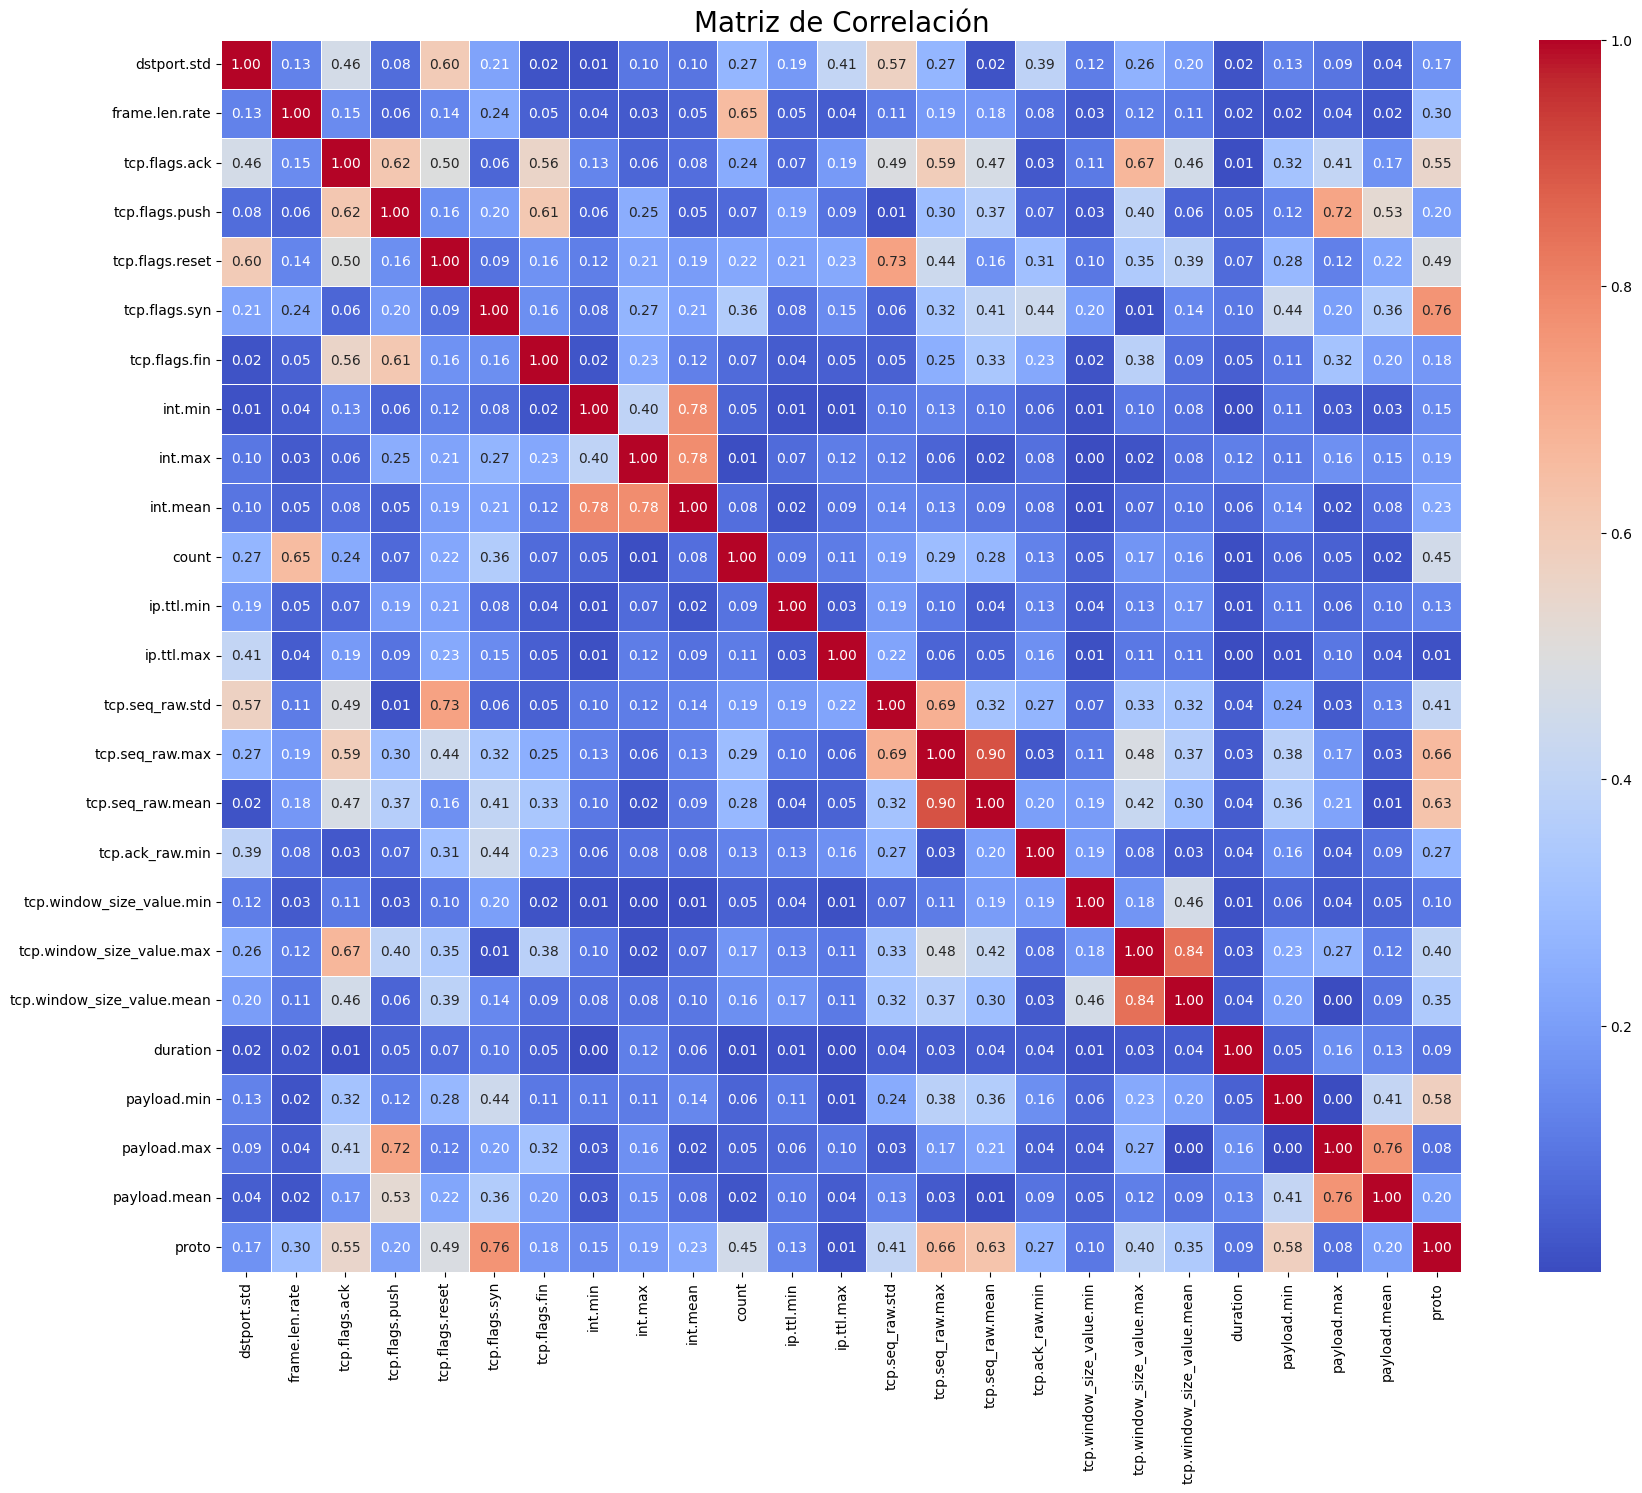

In [ ]:
corr_matrix = X_train.corr().abs()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=20)
plt.show()

In [ ]:
RF = RandomForestClassifier(max_depth=18)

sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.78,
    missing_values="raise",
    selection_method="model_performance",
    estimator=RF,
    scoring="accuracy",
    cv=5,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(cv=5, estimator=SVC(), missing_values='raise',
                         scoring='accuracy',
                         selection_method='model_performance', threshold=0.78)

In [38]:
sel.correlated_feature_sets_

[{'int.max', 'int.mean'},
 {'tcp.seq_raw.max', 'tcp.seq_raw.mean'},
 {'tcp.window_size_value.max', 'tcp.window_size_value.mean'}]

In [39]:
corr_features = sel.features_to_drop_
sel.features_to_drop_

['int.mean', 'tcp.seq_raw.max', 'tcp.window_size_value.mean']

In [ ]:
X_train.drop(columns=corr_features, axis=1, inplace=True)
X_test.drop(columns=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1119, 22), (320, 22))

In [ ]:
RF = RandomForestClassifier()

param_grid = {'max_depth': [18]} 
grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid.fit(X_train, y_train)

print('Best Cross Validation Score:', grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': np.float64(10.1)}
Best Cross Validation Score: 0.6389013452914798
Test Score: 0.665625


In [ ]:
RF =  grid.best_estimator_

print('Train Score:', RF.score(X_train, y_train))

y_pred = RF.predict(X_test)

start2=time.time()
print('Precision en test: ', accuracy_score(y_test, y_pred))
stop2=time.time()

tiempo2 = stop2 - start2
print(f"Tiempo de prediccion (Test) RF: {tiempo2}s")

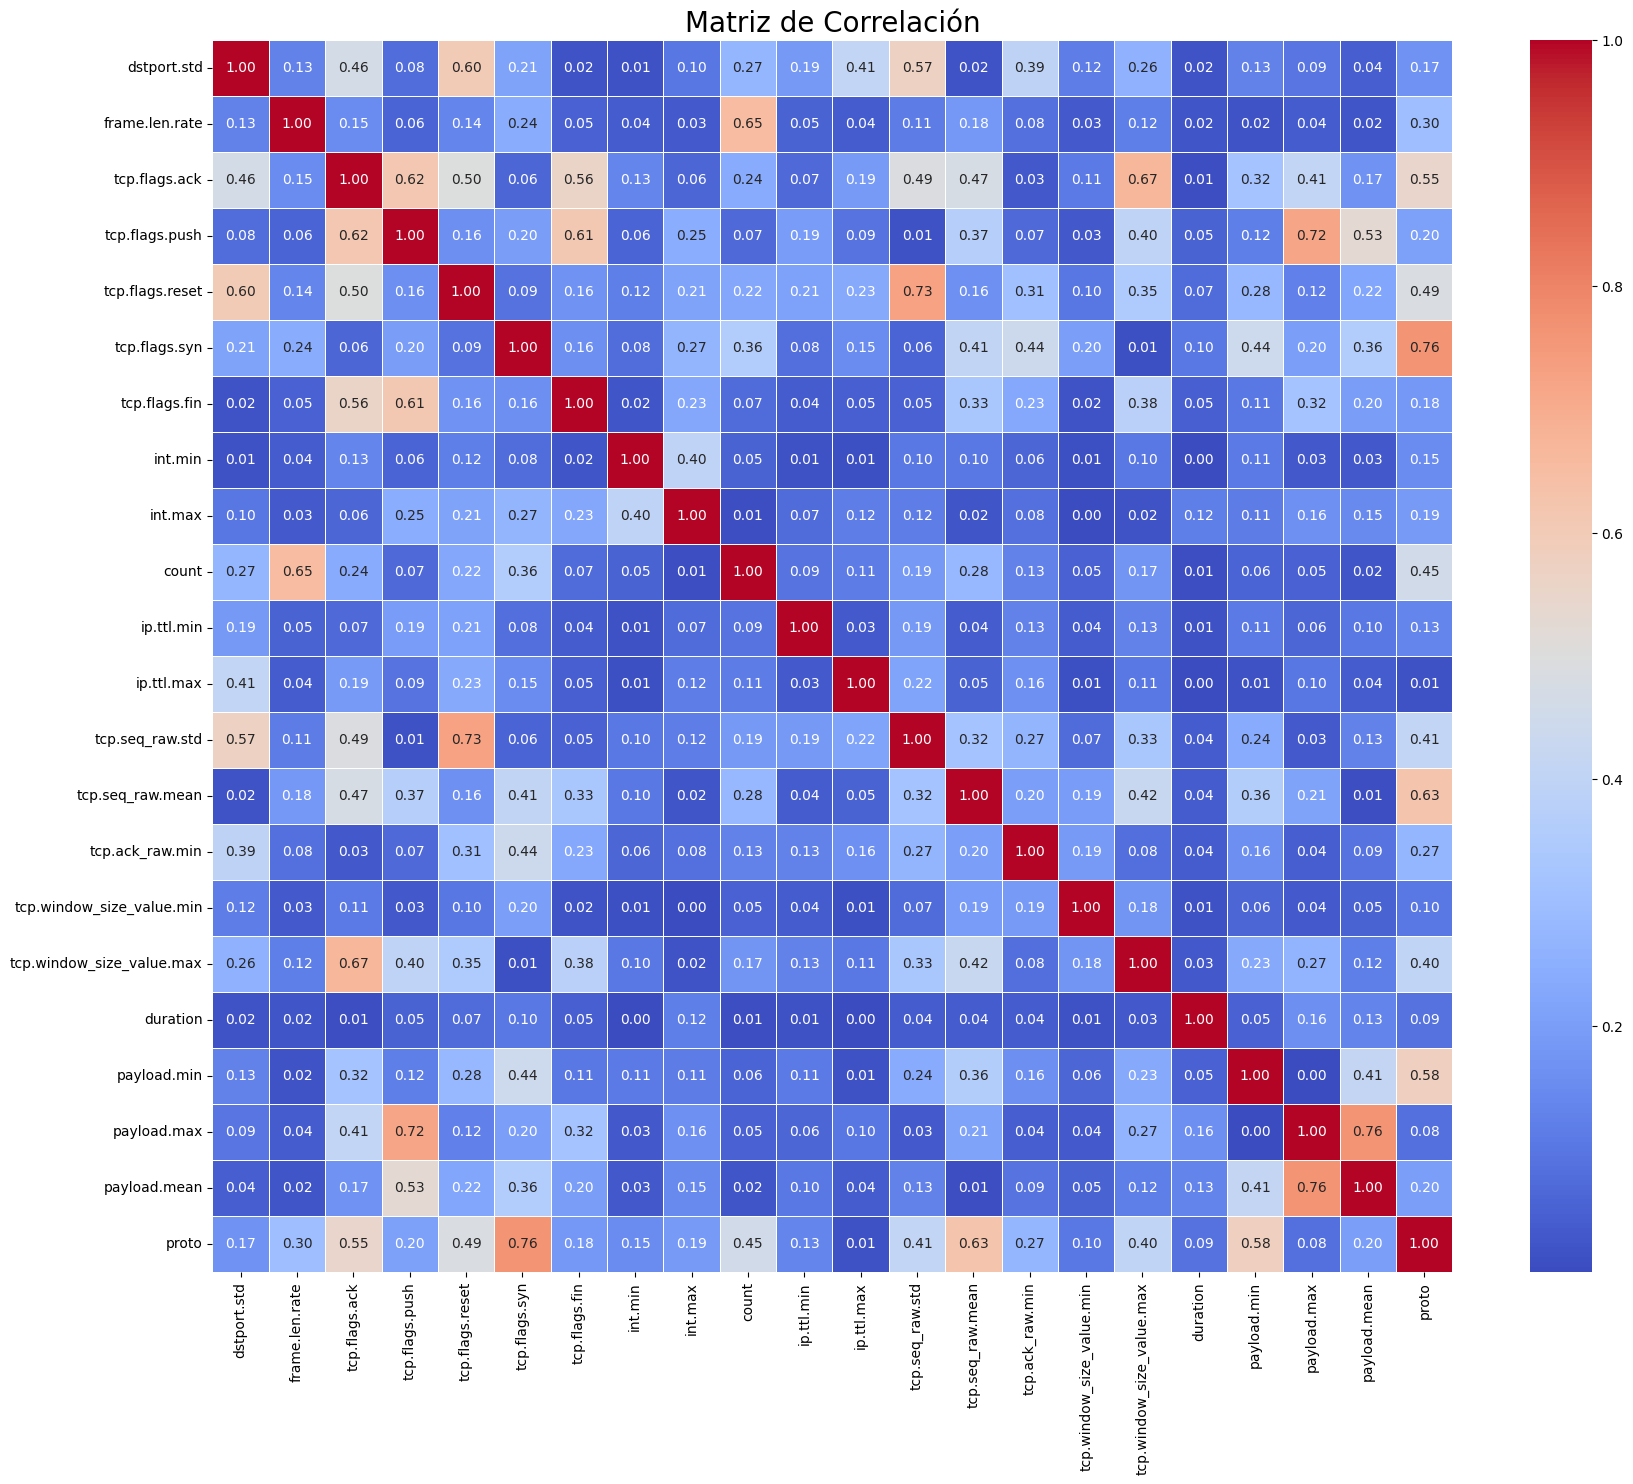

In [ ]:
corr_matrix = X_train.corr().abs()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=20)
plt.show()

### NOT USED

In [27]:
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.78,
    missing_values="raise",
    selection_method="model_performance",
    estimator=SVM,
    scoring="accuracy",
    cv=5,
)

sel.fit(X_train_reducido, y_train_reducido)

SmartCorrelatedSelection(cv=5, estimator=SVC(), missing_values='raise',
                         scoring='accuracy',
                         selection_method='model_performance', threshold=0.78)

In [28]:
sel.correlated_feature_sets_

[{'tcp.seq_raw.mean', 'tcp.seq_raw.min'}]

In [29]:
corr_features = sel.features_to_drop_
sel.features_to_drop_

['tcp.seq_raw.min']

In [30]:
X_train_reducido.drop(columns=corr_features, axis=1, inplace=True)
X_test_reducido.drop(columns=corr_features, axis=1, inplace=True)

X_train_reducido.shape, X_test_reducido.shape

((1119, 22), (320, 22))

In [31]:
SVM = svm.SVC(kernel='rbf', gamma='scale')

param_grid = {'C': list(np.arange(0.1, 40, 1))}
grid = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_reducido, y_train_reducido)

print('Best Parameters:', grid.best_params_)
print('Best Cross Validation Score:', grid.best_score_)
print('Test Score:', grid.score(X_test_reducido, y_test_reducido))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': np.float64(38.1)}
Best Cross Validation Score: 0.629091928251121
Test Score: 0.6625


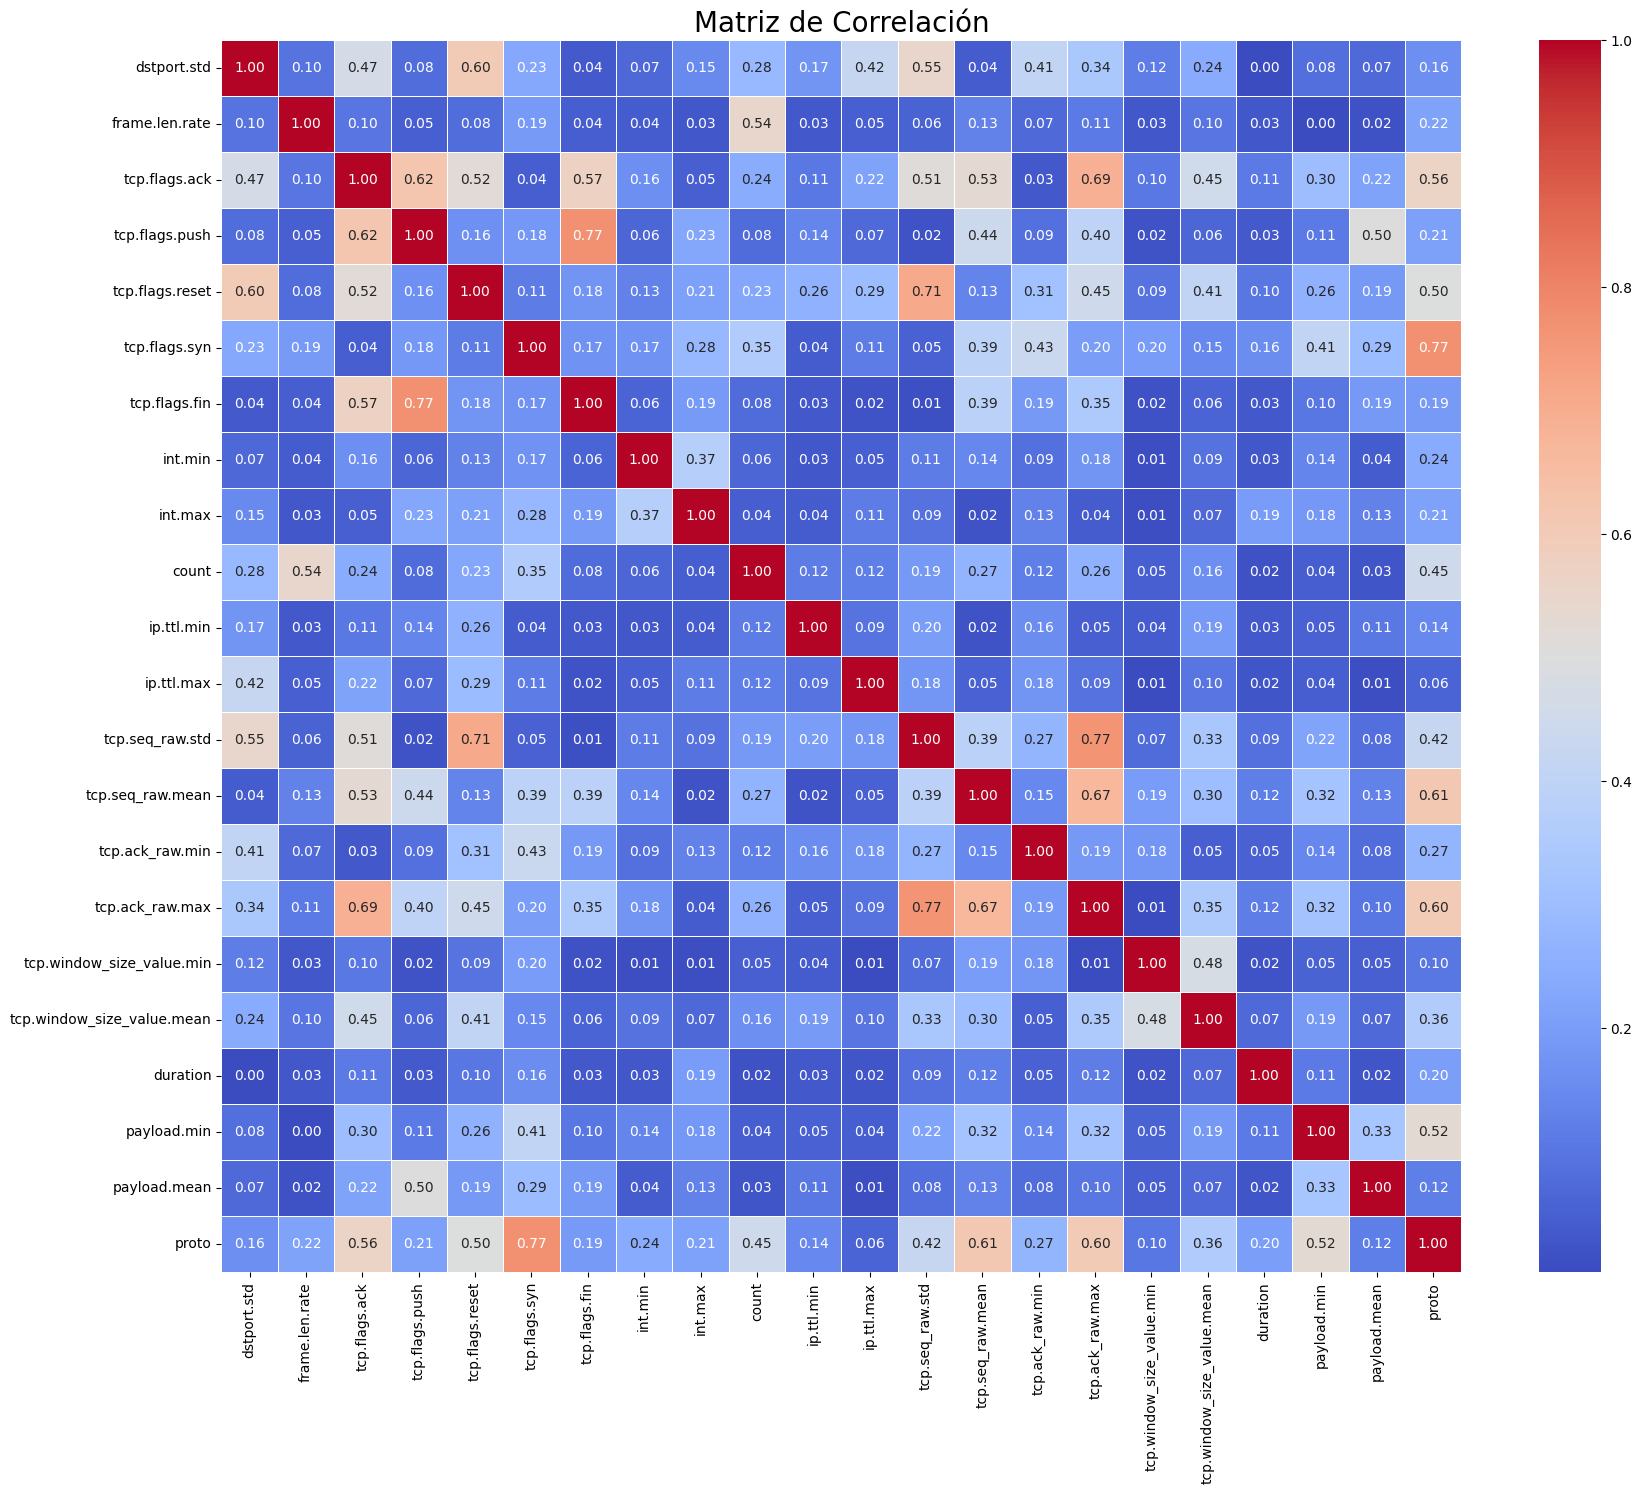

In [32]:
corr_matrix = X_train_reducido.corr().abs()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=20)
plt.show()

In [43]:
X_train_reducido = X_train_reducido.reset_index(drop=True)
y_train_reducido = y_train_reducido.reset_index(drop=True)
train = pd.concat([X_train_reducido, y_train_reducido], axis=1)

X_test_reducido = X_test_reducido.reset_index(drop=True)
y_test_reducido = y_test_reducido.reset_index(drop=True)
test = pd.concat([X_test_reducido, y_test_reducido], axis=1)

In [44]:

train.to_csv('train_C.csv', index=False)
test.to_csv('test_C.csv', index=False)